In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.animation as animation
import datetime
import seaborn as sns
sns.set_theme(style="whitegrid")
%matplotlib inline 

In [ ]:
cuaca = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/auto_weather_stat/id-03/data.json")
geomagnetik = pd.read_json("https://staklimjerukagung-default-rtdb.asia-southeast1.firebasedatabase.app/geomagnetic_stat/id-01/data.json")

In [ ]:
cuacaT=cuaca.transpose()
cuacaT.tail(30)

,dew,humidity,pressure,temperature,timestamp,volt
1727698503,26.00,88.40,1011.79,28.10,1.727699e+09,4.05
1727698564,26.02,88.34,1011.81,28.13,1.727699e+09,4.05
1727698623,25.98,88.33,1011.83,28.09,1.727699e+09,4.05
1727698684,26.01,88.39,1011.81,28.11,1.727699e+09,4.05
1727698743,25.99,88.40,1011.83,28.09,1.727699e+09,4.05
1727698804,25.97,88.31,1011.88,28.09,1.727699e+09,4.05
1727698864,25.98,88.30,1011.91,28.10,1.727699e+09,4.05
1727698924,26.01,88.49,1011.92,28.09,1.727699e+09,4.05
1727698983,26.00,88.54,1011.95,28.07,1.727699e+09,4.05
1727699044,26.01,88.61,1011.98,28.07,1.727699e+09,4.06


In [ ]:
cuacaT.describe()

,dew,humidity,pressure,temperature,timestamp,volt
count,410551.000000,410552.000000,410552.000000,410552.000000,4.105520e+05,410552.000000
mean,25.001424,85.682258,1011.431212,27.809869,1.715068e+09,4.091218
std,1.514347,11.166864,2.807347,3.284721,7.802833e+06,0.030871
min,17.670000,0.000000,0.000000,0.020000,0.000000e+00,0.000000
25%,24.130000,76.900000,1010.190000,25.390000,1.708647e+09,4.070000
50%,25.070000,90.110000,1011.480000,26.910000,1.715170e+09,4.090000
75%,26.050000,94.760000,1012.770000,30.290000,1.721405e+09,4.120000
max,29.700000,99.580000,1016.530000,41.120000,1.727700e+09,4.170000


In [ ]:
cuacaT['timestamp']= cuacaT['timestamp'].astype(int)
cuacaT.tail(30)

,dew,humidity,pressure,temperature,timestamp,volt
1727698503,26.00,88.40,1011.79,28.10,1727698503,4.05
1727698564,26.02,88.34,1011.81,28.13,1727698564,4.05
1727698623,25.98,88.33,1011.83,28.09,1727698623,4.05
1727698684,26.01,88.39,1011.81,28.11,1727698684,4.05
1727698743,25.99,88.40,1011.83,28.09,1727698743,4.05
1727698804,25.97,88.31,1011.88,28.09,1727698804,4.05
1727698864,25.98,88.30,1011.91,28.10,1727698864,4.05
1727698924,26.01,88.49,1011.92,28.09,1727698924,4.05
1727698983,26.00,88.54,1011.95,28.07,1727698983,4.05
1727699044,26.01,88.61,1011.98,28.07,1727699044,4.06


In [ ]:
cuacaT['timestamp'] = pd.to_datetime(cuacaT['timestamp'], unit='s').dt.strftime('%Y-%m-%d %H:%M:%S')
cuacaT.tail(10)

,dew,humidity,pressure,temperature,timestamp,volt
1727699704,26.01,88.85,1012.15,28.02,2024-09-30 12:35:04,4.05
1727699764,25.96,88.90,1012.06,27.96,2024-09-30 12:36:04,4.05
1727699824,25.96,89.01,1012.06,27.94,2024-09-30 12:37:04,4.05
1727699884,25.99,89.10,1012.08,27.95,2024-09-30 12:38:04,4.05
1727699944,25.98,89.01,1012.12,27.96,2024-09-30 12:39:04,4.05
1727700004,25.97,88.96,1012.15,27.96,2024-09-30 12:40:04,4.05
1727700064,26.00,89.03,1012.11,27.98,2024-09-30 12:41:04,4.05
1727700124,26.03,89.05,1012.10,28.00,2024-09-30 12:42:04,4.05
1727700184,25.99,88.99,1012.10,27.98,2024-09-30 12:43:04,4.05
1727700245,26.01,89.03,1012.12,27.99,2024-09-30 12:44:05,4.05


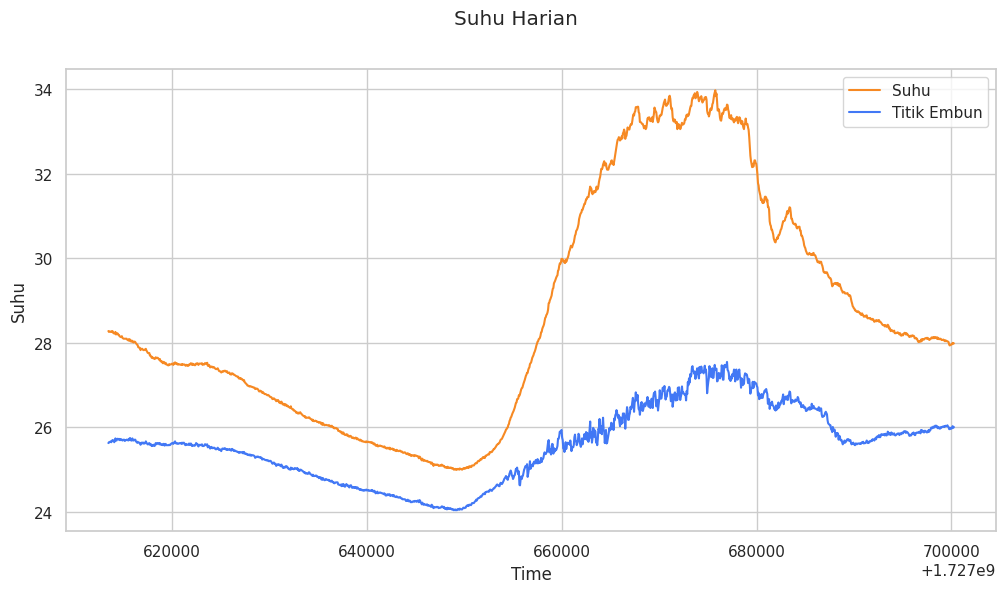

In [ ]:
plt.rcParams["figure.figsize"] = (12,6)
jam = 24
def plot_data(data, variable, color, label, last_n_points):
    """
    Plots a line chart for a specific variable.
    Parameters:
    - data (dict): A dictionary containing the data.
    - variable (str): The variable to plot.
    - color (str): The color of the line.
    - label (str): The label for the line in the legend.
    - last_n_points (int): The number of last points to plot.
    """
    plt.plot(data[variable].tail(last_n_points), color=color, label=label)

# Contoh penggunaan fungsi
plot_data(cuacaT, 'temperature', '#f68923', 'Suhu',60*jam)
plot_data(cuacaT, 'dew', '#4278f5', 'Titik Embun',60*jam)

# Menambahkan judul dan label sumbu
plt.suptitle("Suhu Harian")
plt.xlabel('Time')
plt.ylabel('Suhu')

# Menambahkan legenda
plt.legend()

# Menyimpan gambar ke file 'grafik_Suhu.png'
plt.savefig('grafik_Suhu.png')

# Menampilkan plot
plt.show()

In [ ]:
import plotly.graph_objects as go

temperature = cuacaT['temperature'].tail(60*jam)
humidity = cuacaT['humidity'].tail(60*jam)
pressure = cuacaT['pressure'].tail(60*jam)

# Create 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=temperature,
    y=humidity,
    z=pressure,
    mode='markers',
    marker=dict(
        size=5,
        color=temperature,              # Color by temperature
        colorscale='Viridis',           # Colormap
        opacity=0.8
    )
)])

# Add labels and title
fig.update_layout(
    scene=dict(
        xaxis_title='Temperature (°C)',
        yaxis_title='Humidity (%)',
        zaxis_title='Pressure (hPa)'
    ),
    title='3D Scatter Plot of Temperature, Humidity, and Pressure'
)

# Show the plot
fig.show()


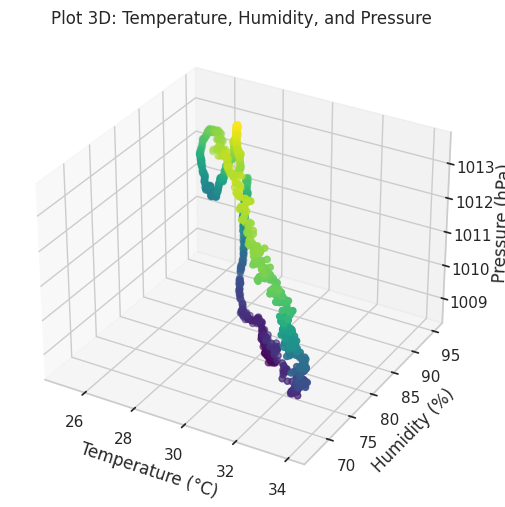

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = temperature = cuacaT['temperature'].tail(60*jam)
y = humidity = cuacaT['humidity'].tail(60*jam)
z = pressure = cuacaT['pressure'].tail(60*jam)


# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the 3D scatter
ax.scatter(x, y, z, c=z, cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Humidity (%)')
ax.set_zlabel('Pressure (hPa)')

# Add a title
ax.set_title('Plot 3D: Temperature, Humidity, and Pressure')

# Show the plot
plt.show()


In [ ]:
# Simpan DataFrame 'cuacaT' ke file CSV bernama 'Cuaca.csv'
# Menyimpan 1000 data terakhir dari DataFrame cuacaT ke file CSV
cuacaT.tail(10080).to_csv(
    'cuaca.csv', 
    sep=',',
    index=False,
    index_label='timestamp'
)

In [9]:
datacuaca = (lambda: _deepnote_execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT \n    *\nFROM \'cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
datacuaca

,dew,humidity,pressure,temperature,timestamp,volt
0,25.91,83.49,1010.01,28.99,2024-09-23 10:24:06,4.05
1,25.91,83.47,1010.05,29.00,2024-09-23 10:25:06,4.06
2,25.88,83.41,1010.10,28.98,2024-09-23 10:26:06,4.09
3,25.96,83.67,1010.14,29.01,2024-09-23 10:27:06,4.06
4,25.96,83.68,1010.17,29.00,2024-09-23 10:28:06,4.09
...,...,...,...,...,...,...
10075,25.97,88.96,1012.15,27.96,2024-09-30 12:40:04,4.05
10076,26.00,89.03,1012.11,27.98,2024-09-30 12:41:04,4.05
10077,26.03,89.05,1012.10,28.00,2024-09-30 12:42:04,4.05
10078,25.99,88.99,1012.10,27.98,2024-09-30 12:43:04,4.05


In [25]:
(lambda: DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"timestamp","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"temperature"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"timestamp","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"dew","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"dew"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(datacuaca, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"timestamp","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"temperature","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"temperature"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"timestamp","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"dew","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"formatType":"numberFormatFromNumberType"},"color":{"datum":"dew"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

In [1]:
import requests
import pandas as pd

# Konfigurasi API ThingSpeak
channel_id = 2326256
read_api_key = 'BKIJNOYDM205J2HG'
url = f'https://api.thingspeak.com/channels/{channel_id}/feeds.json'

# Parameter untuk permintaan API
params = {
    'api_key': read_api_key,
    'results': 1440  # Jumlah data yang ingin diambil, bisa disesuaikan
}

# Mengirim permintaan GET ke ThingSpeak
response = requests.get(url, params=params)

# Cek apakah permintaan berhasil
if response.status_code == 200:
    # Mengambil data feed dalam format JSON
    data = response.json()
    feeds = data['feeds']
    
    # Membuat DataFrame Pandas dari data feed
    df = pd.DataFrame(feeds)
    
    # Pilih kolom-kolom yang ingin disimpan, misalnya waktu dan field1 hingga field8
    df = df[['created_at', 'field1', 'field2', 'field3', 'field4', 'field8']]
    
    # Ganti nama kolom untuk lebih deskriptif
    df.columns = ['Time', 'Suhu', 'Kelembapan', 'Tekanan', 'Embun', 'Volt']
    
    # Simpan DataFrame ke file CSV
    df.to_csv('Cuaca.csv', index=False)
    
    # Tampilkan DataFrame untuk pengecekan
    print(df.head())
else:
    print(f"Failed to fetch data. HTTP Status code: {response.status_code}")


                   Time   Suhu Kelembapan  Tekanan  Embun  Volt
0  2024-09-29T12:46:47Z  28.24      86.07  1012.79  25.69  4.05
1  2024-09-29T12:47:47Z  28.22      85.96  1012.79  25.65  4.05
2  2024-09-29T12:48:47Z  28.23      86.11  1012.75  25.69  4.05
3  2024-09-29T12:49:47Z  28.26      86.22  1012.79  25.74  4.05
4  2024-09-29T12:50:47Z  28.20      86.31  1012.77  25.69  4.05


In [3]:
dataHarian = (lambda: _deepnote_execute_sql('SELECT *\nFROM \'Cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled') if '_deepnote_execute_sql' in globals() else _dntk.execute_sql('SELECT *\nFROM \'Cuaca.csv\'', 'SQL_DEEPNOTE_DATAFRAME_SQL', audit_sql_comment='', sql_cache_mode='cache_disabled'))()
dataHarian

,Time,Suhu,Kelembapan,Tekanan,Embun,Volt
0,2024-09-29 12:46:47,28.24,86.07,1012.79,25.69,4.05
1,2024-09-29 12:47:47,28.22,85.96,1012.79,25.65,4.05
2,2024-09-29 12:48:47,28.23,86.11,1012.75,25.69,4.05
3,2024-09-29 12:49:47,28.26,86.22,1012.79,25.74,4.05
4,2024-09-29 12:50:47,28.20,86.31,1012.77,25.69,4.05
...,...,...,...,...,...,...
1435,2024-09-30 12:51:03,28.01,88.95,1012.10,26.02,4.05
1436,2024-09-30 12:52:04,28.00,88.99,1012.01,26.01,4.05
1437,2024-09-30 12:53:04,28.00,88.99,1012.04,26.01,4.05
1438,2024-09-30 12:54:04,28.00,89.00,1012.13,26.02,4.05


In [29]:
(lambda: DeepnoteChart(dataHarian, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Suhu","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"datum":"Sum of Suhu"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Embun","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"datum":"Sum of Embun"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}""") if 'DeepnoteChart' in globals() else _dntk.DeepnoteChart(dataHarian, """{"layer":[{"layer":[{"mark":{"clip":true,"type":"trail","color":"#2266D3","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Suhu","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"datum":"Sum of Suhu"}}}]},{"layer":[{"mark":{"clip":true,"type":"trail","color":"#4c78a8","tooltip":true},"encoding":{"x":{"axis":{"grid":false},"sort":"ascending","type":"temporal","field":"Time","scale":{"type":"linear","zero":false}},"y":{"axis":{"grid":false},"sort":null,"type":"quantitative","field":"Embun","scale":{"type":"linear","zero":false},"format":{"type":"default","decimals":null},"aggregate":"sum","formatType":"numberFormatFromNumberType"},"color":{"datum":"Sum of Embun"}}}]}],"title":"","config":{"legend":{}},"$schema":"https://vega.github.io/schema/vega-lite/v5.json","encoding":{},"usermeta":{"tooltipDefaultMode":true}}"""))()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>